In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Load the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Class labels
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(x_train, y_train_cat, epochs=25,
                    validation_data=(x_test, y_test_cat),
                    batch_size=64)


Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 81ms/step - accuracy: 0.2627 - loss: 1.9535 - val_accuracy: 0.4995 - val_loss: 1.3940
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 80ms/step - accuracy: 0.4716 - loss: 1.4680 - val_accuracy: 0.5248 - val_loss: 1.2776
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 78ms/step - accuracy: 0.5340 - loss: 1.3177 - val_accuracy: 0.5883 - val_loss: 1.1365
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 80ms/step - accuracy: 0.5732 - loss: 1.2084 - val_accuracy: 0.6327 - val_loss: 1.0342
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 78ms/step - accuracy: 0.6151 - loss: 1.0966 - val_accuracy: 0.6585 - val_loss: 0.9667
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 82ms/step - accuracy: 0.6340 - loss: 1.0423 - val_accuracy: 0.6623 - val_loss: 0.9554
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 76ms/step - accuracy: 0.6632 - loss: 0.9770 - val_accuracy: 0.6744 - val_loss: 0.9334
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 78ms/step - accuracy: 0.6665 - loss: 0.9441 - 

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat, verbose=2)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")

313/313 - 4s - 13ms/step - accuracy: 0.7383 - loss: 0.8980

Test Accuracy: 73.83%


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


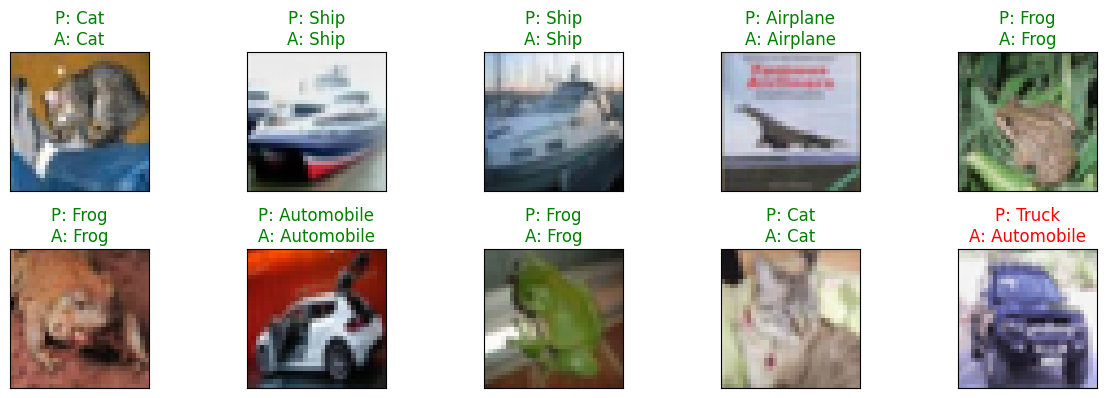

In [ ]:
predictions = model.predict(x_test)

# Display 10 test images with predicted and actual labels
plt.figure(figsize=(12, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])

    # Get actual and predicted labels
    actual_label = class_names[y_test[i][0]]
    predicted_label = class_names[np.argmax(predictions[i])]

    # Set title color based on prediction correctness
    color = 'green' if predicted_label == actual_label else 'red'
    plt.title(f"P: {predicted_label}\nA: {actual_label}", color=color)

plt.tight_layout()
plt.show()